In [1]:
import numpy as np
import pandas as pd
import geopandas as gpd

import matplotlib.pyplot as plt
import seaborn as sns

import pickle
import time

np.random.seed(24) # 42

/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)
/home/polichinel/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: numpy.dtype size changed, may indicate binary incompatibility. Expected 96, got 88
  return f(*args, **kwds)


In [2]:
pkl_file = open('train_df_sce.pkl', 'rb')
df = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('cm_mu_list_full.pkl', 'rb')
cm_mu_list_full = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('cm_var_list_full.pkl', 'rb')
cm_var_list_full = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('dce_mu_list_full.pkl', 'rb')
dce_mu_list_full = pickle.load(pkl_file)
pkl_file.close()

pkl_file = open('dce_var_list_full.pkl', 'rb')
dce_var_list_full = pickle.load(pkl_file)
pkl_file.close()

df_sorted = df.sort_values(['gid','year']).copy() # cm_mu_train_years.shape

# test:

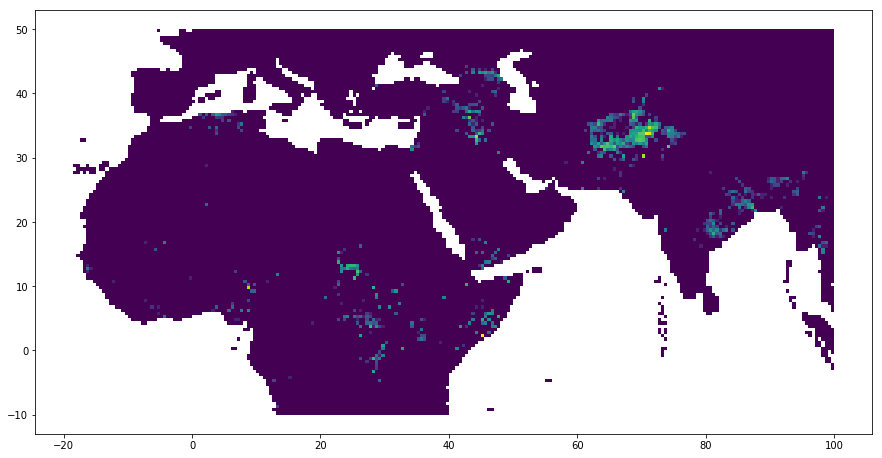

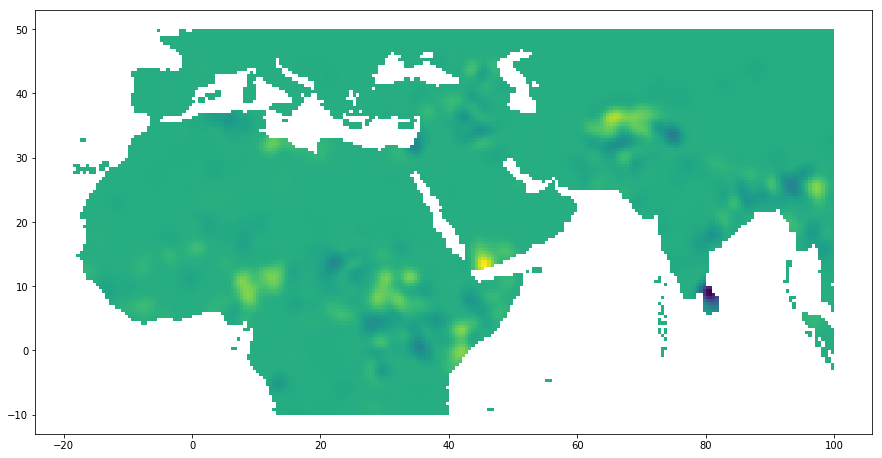

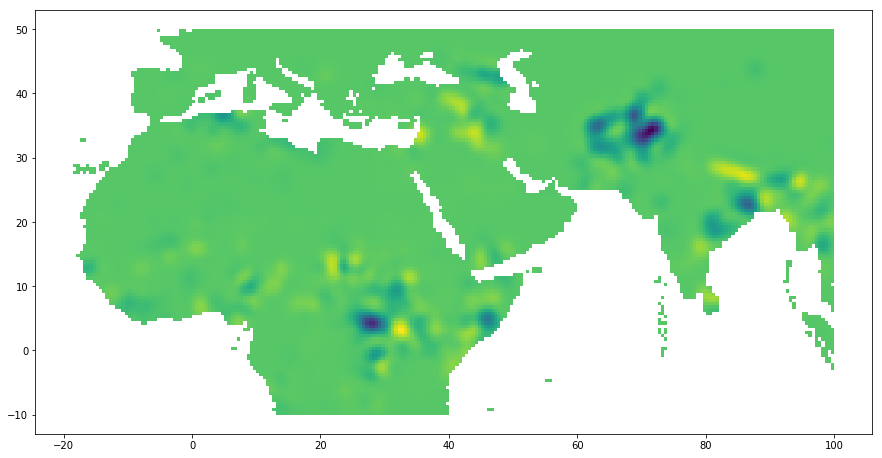

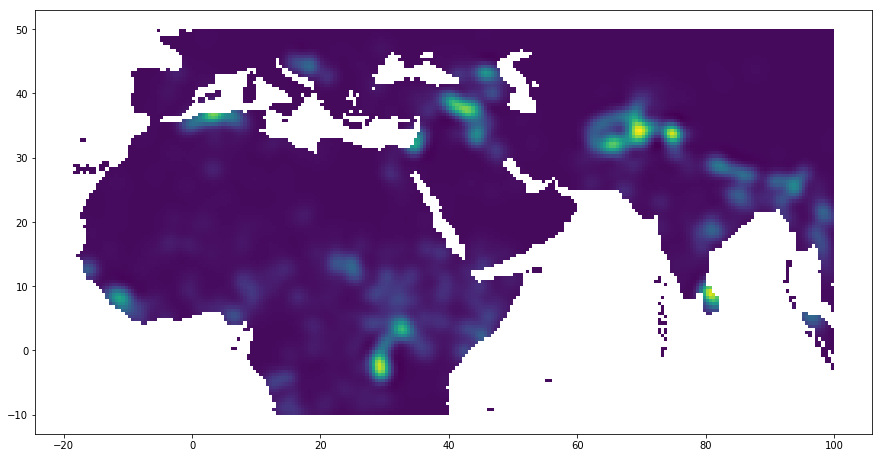

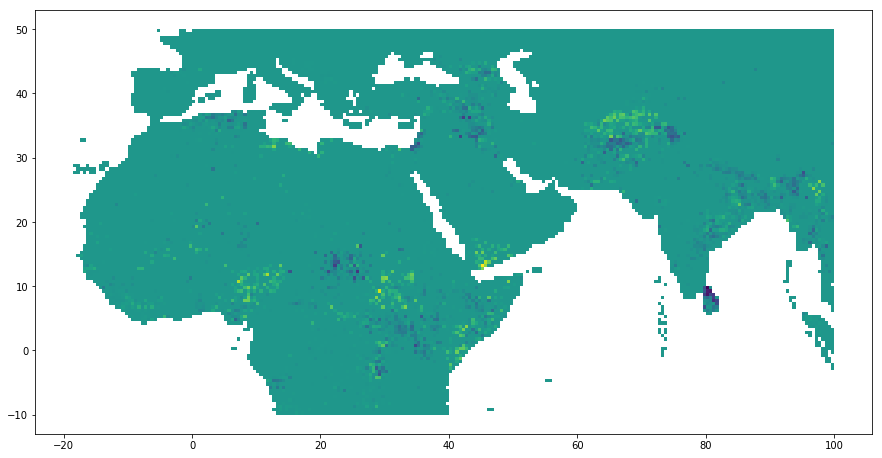

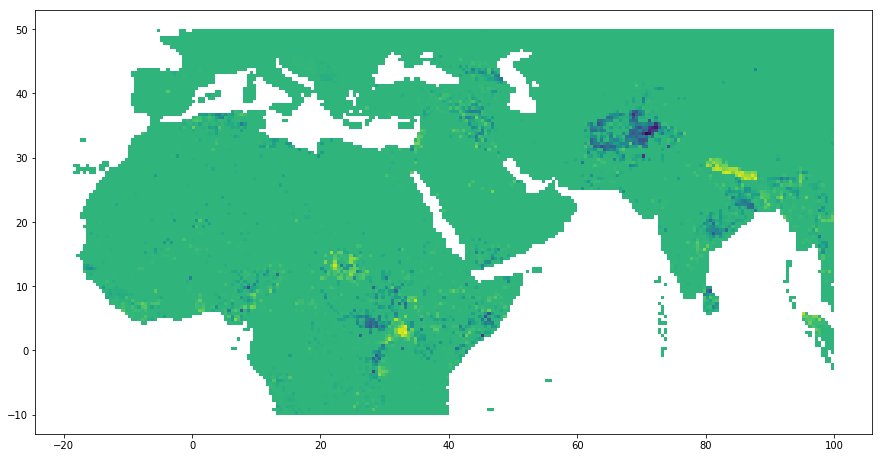

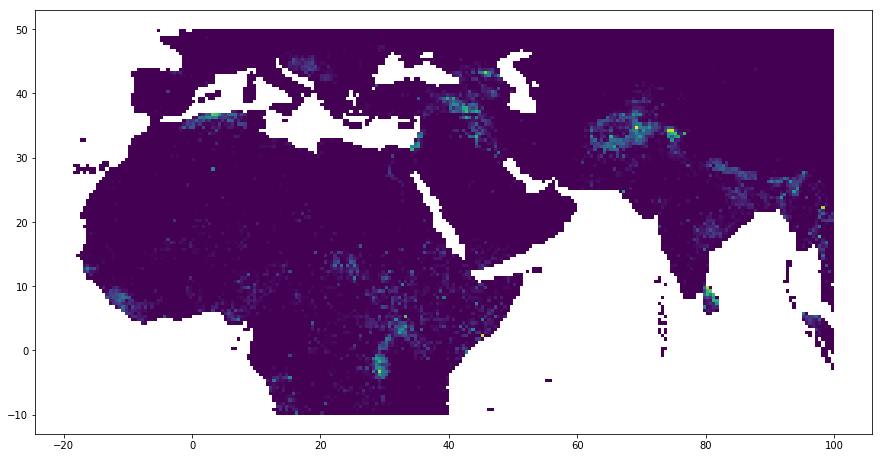

In [4]:

def test_plots():
    
    dce_mu = np.array(dce_mu_list_full)[:,0:24].flatten()
    cm_mu = np.array(cm_mu_list_full)[:,0:24].flatten()

    dce_slope = np.gradient(dce_mu)
    cm_slope = np.gradient(cm_mu)

    dce_acc = np.gradient(dce_slope)
    cm_acc = np.gradient(cm_slope)


    # you just use the original df when you want to add extrapolated years
    df_sorted['dce_mu'] = dce_mu
    df_sorted['cm_mu'] = cm_mu
    df_sorted['dce_slope'] = dce_slope
    df_sorted['cm_slope'] = cm_slope
    df_sorted['dce_acc'] = dce_acc
    df_sorted['cm_acc'] = cm_acc

    df_sorted['cm_mass'] = df_sorted.groupby(['gid'])['cm_mu'].transform(np.trapz) 
    df_sorted['dce_mass'] = df_sorted.groupby(['gid'])['dce_mu'].transform(np.trapz) 


    df_sorted[df_sorted['year']==2010].plot(column = 'log_best', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'dce_slope', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'dce_acc', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'dce_mass', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'cm_slope', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'cm_acc', figsize=(15, 15))
    df_sorted[df_sorted['year']==2010].plot(column = 'cm_mass', figsize=(15, 15))


    plt.show()
    
test_plots()

# Import the original full dataset. insert all X_new and split into train and test agin
That is the easy way

In [5]:

def df_all_features():
    pkl_file = open('restricted_df.pkl', 'rb')

    df = pickle.load(pkl_file)

    pkl_file.close()
    df_sorted = df.sort_values(['gid','year']).copy() # cm_mu_train_years.shape

    dce_mu = np.array(dce_mu_list_full).flatten()
    cm_mu = np.array(cm_mu_list_full).flatten()

    dce_slope = np.gradient(dce_mu)
    cm_slope = np.gradient(cm_mu)

    dce_acc = np.gradient(dce_slope)
    cm_acc = np.gradient(cm_slope)

    # Here I just use the original df when you want to add extrapolated years
    df_sorted['dce_mu'] = dce_mu
    df_sorted['cm_mu'] = cm_mu
    df_sorted['dce_slope'] = dce_slope
    df_sorted['cm_slope'] = cm_slope
    df_sorted['dce_acc'] = dce_acc
    df_sorted['cm_acc'] = cm_acc

    df_sorted['cm_mass'] = df_sorted.groupby(['gid'])['cm_mu'].transform(np.trapz) 
    df_sorted['dce_mass'] = df_sorted.groupby(['gid'])['dce_mu'].transform(np.trapz) 

    return(df_sorted)


In [6]:
df = df_all_features()

In [7]:
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 534093 entries, 1435801 to 1838173
Data columns (total 18 columns):
gid          534093 non-null int64
xcoord       534093 non-null float64
ycoord       534093 non-null float64
col          534093 non-null float64
row          534093 non-null float64
geometry     534093 non-null object
year         534093 non-null int64
gwno         534093 non-null float64
best         534093 non-null float64
log_best     534093 non-null float64
dce_mu       534093 non-null float64
cm_mu        534093 non-null float64
dce_slope    534093 non-null float64
cm_slope     534093 non-null float64
dce_acc      534093 non-null float64
cm_acc       534093 non-null float64
cm_mass      534093 non-null float64
dce_mass     534093 non-null float64
dtypes: float64(15), int64(2), object(1)
memory usage: 77.4+ MB


In [9]:
def test_plots2(df, year):
    
    df[df['year']==year].plot(column = 'log_best', figsize=(15, 15))
    df[df['year']==year].plot(column = 'dce_slope', figsize=(15, 15))
    df[df['year']==year].plot(column = 'dce_acc', figsize=(15, 15))
    df[df['year']==year].plot(column = 'dce_mass', figsize=(15, 15))
    df[df['year']==year].plot(column = 'cm_slope', figsize=(15, 15))
    df[df['year']==year].plot(column = 'cm_acc', figsize=(15, 15))
    df[df['year']==year].plot(column = 'cm_mass', figsize=(15, 15))
    
    plt.show()

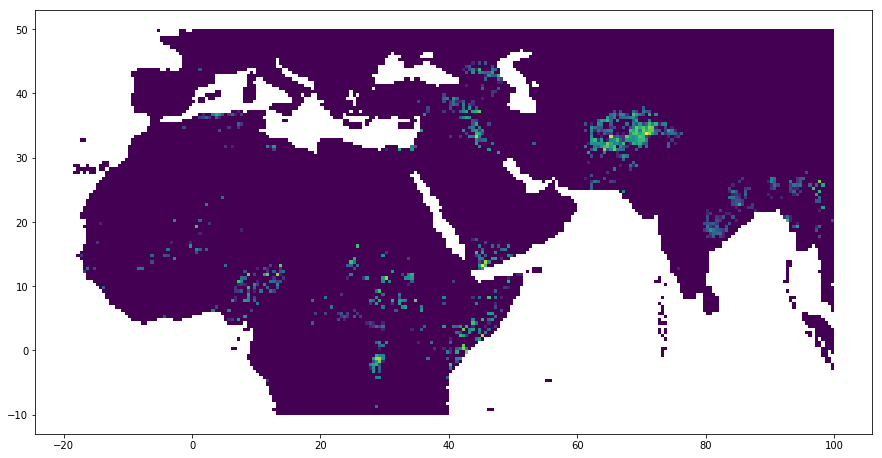

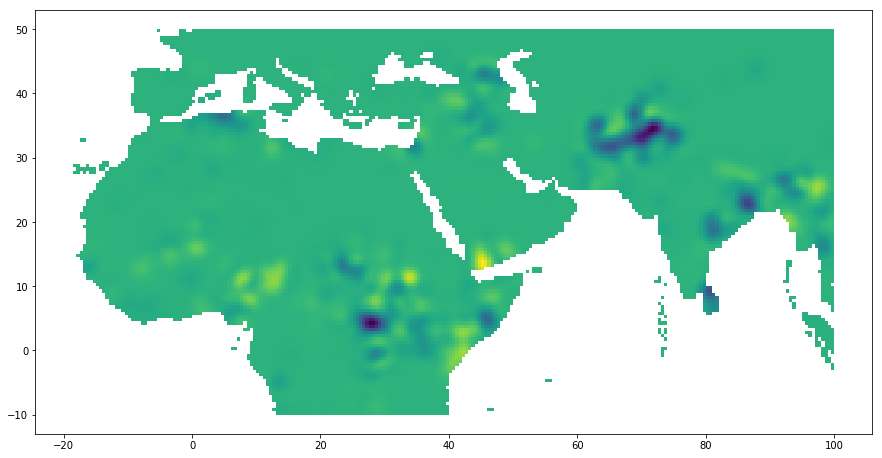

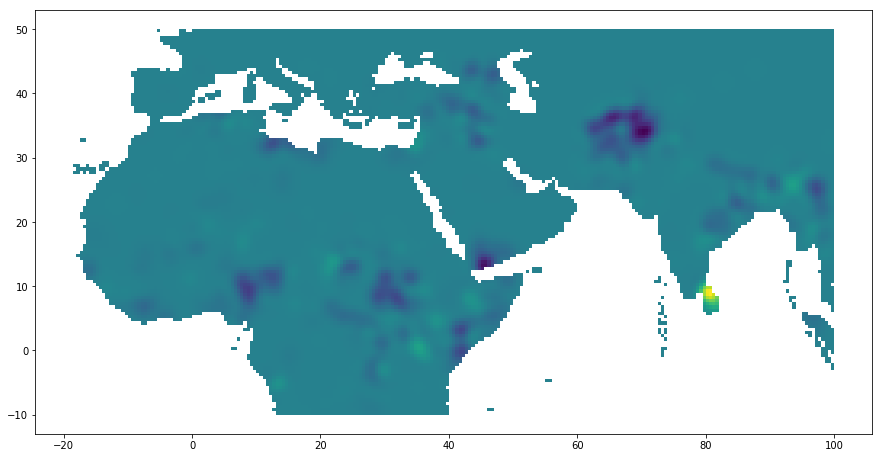

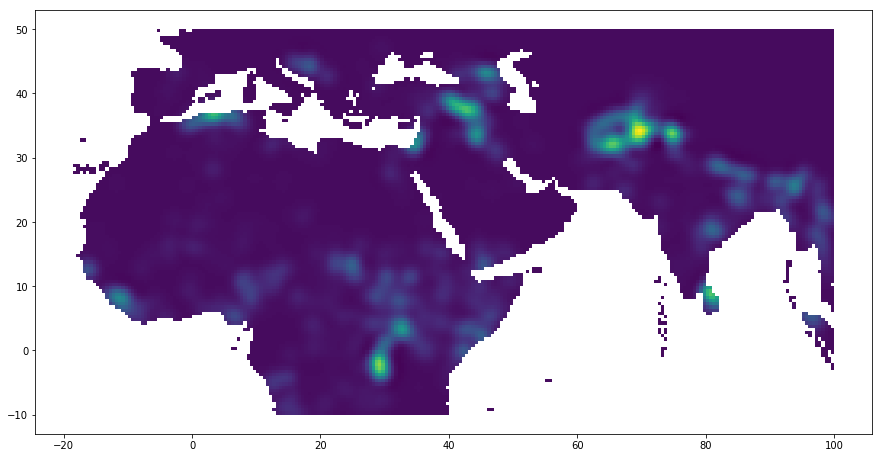

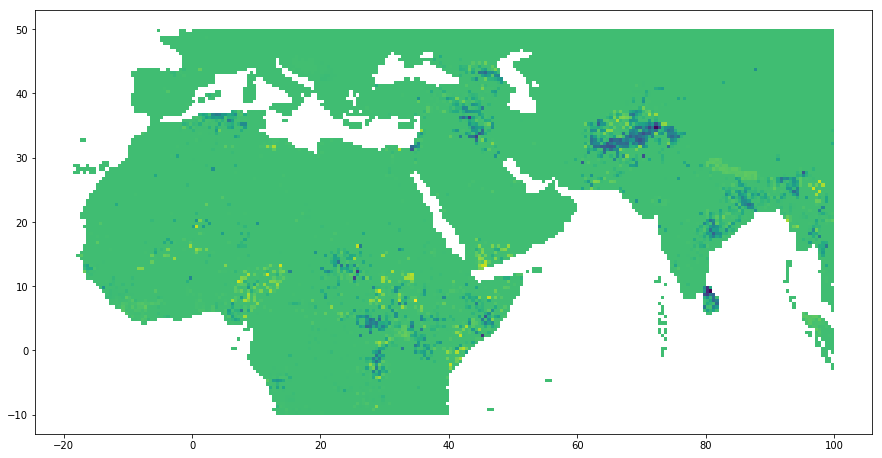

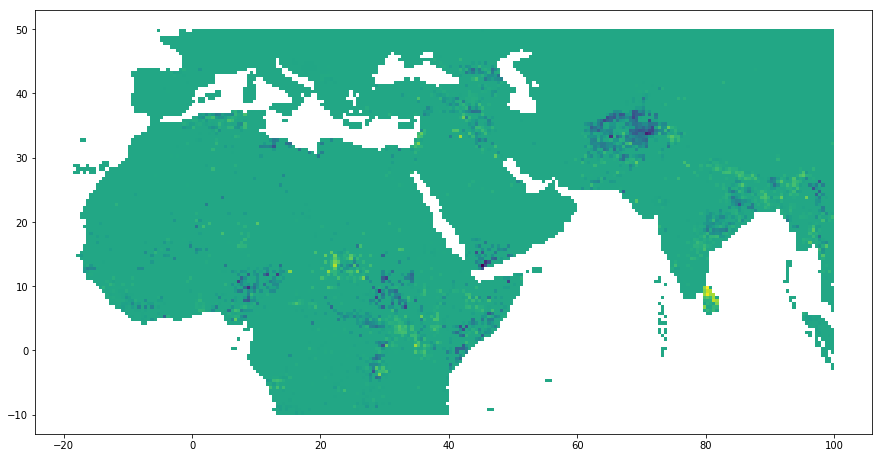

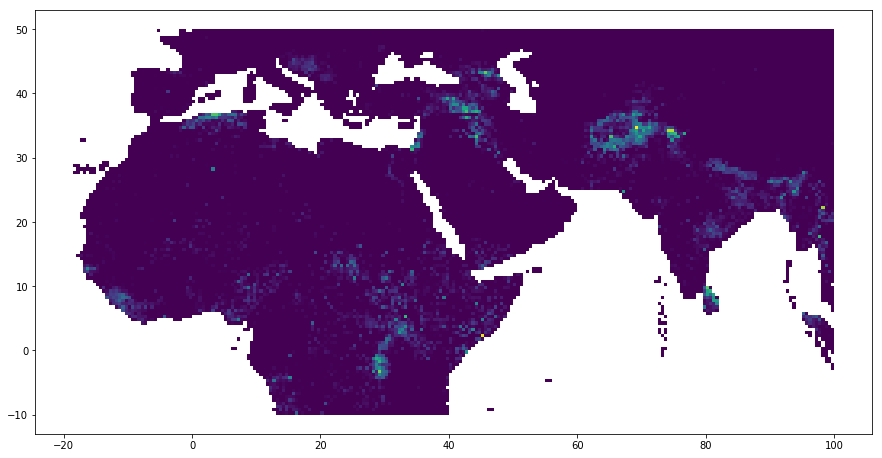

In [10]:
test_plots2(df, 2012)

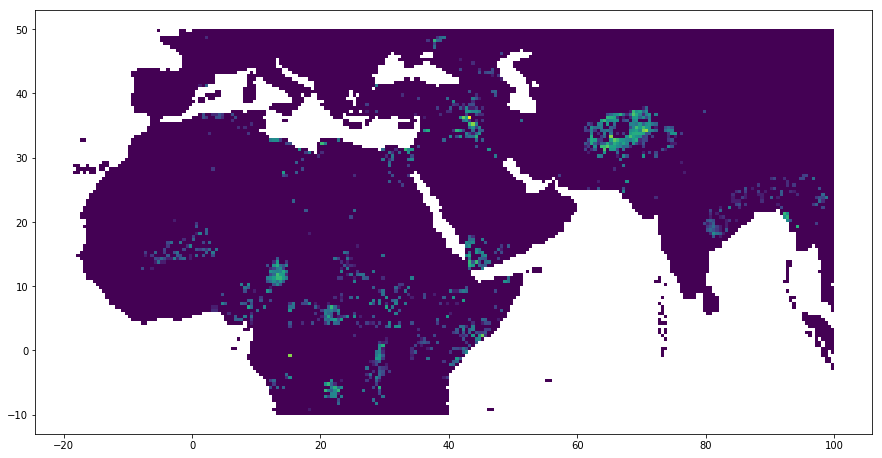

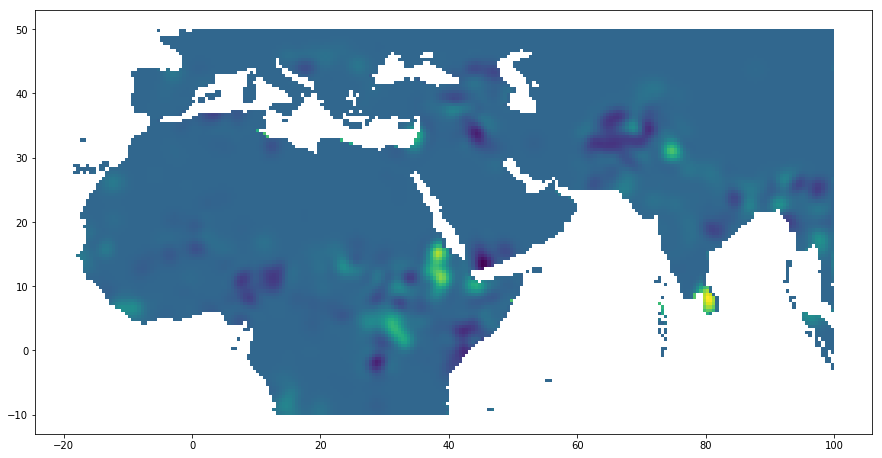

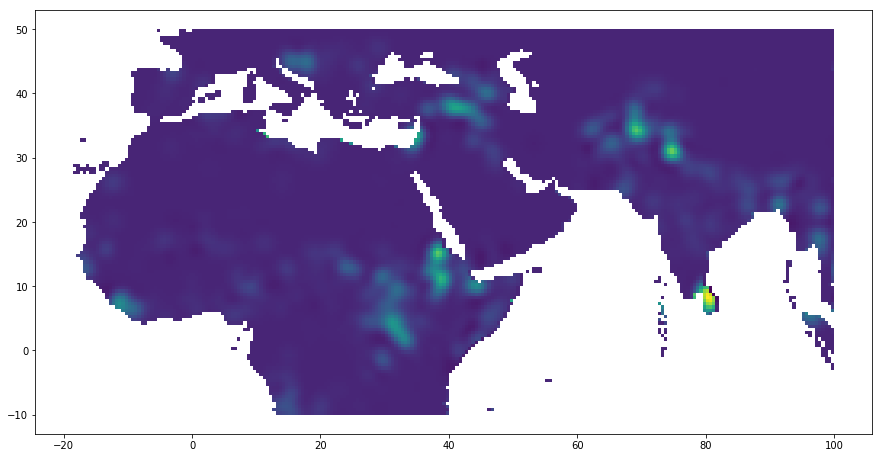

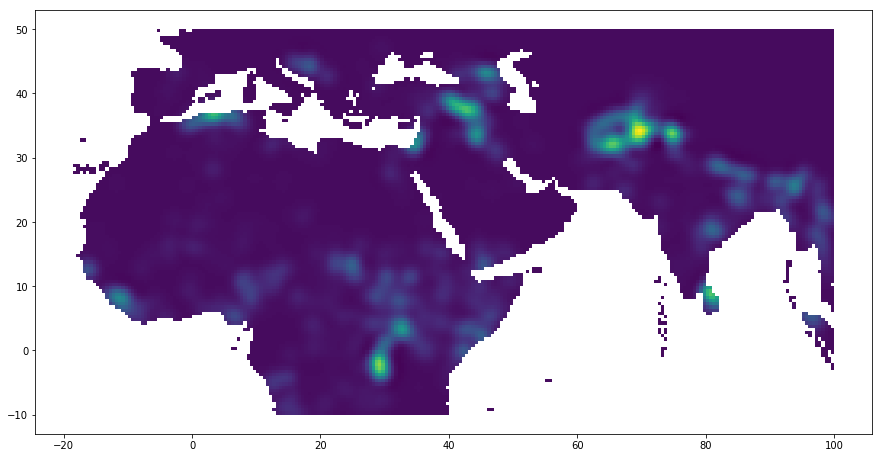

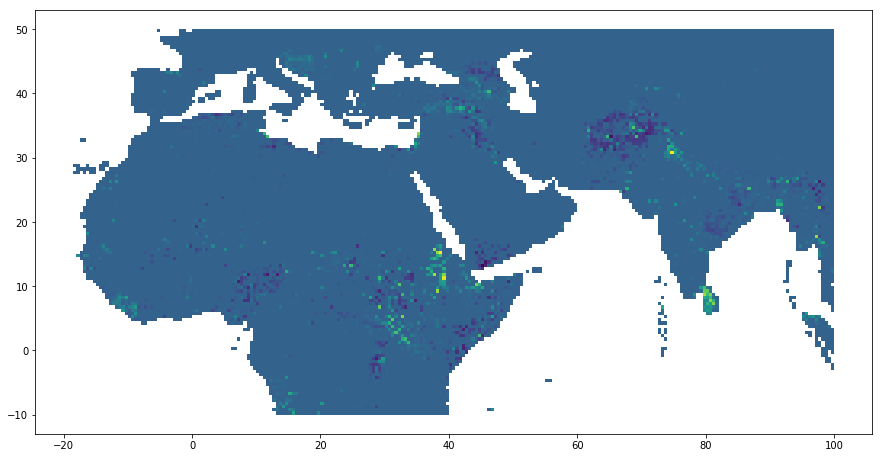

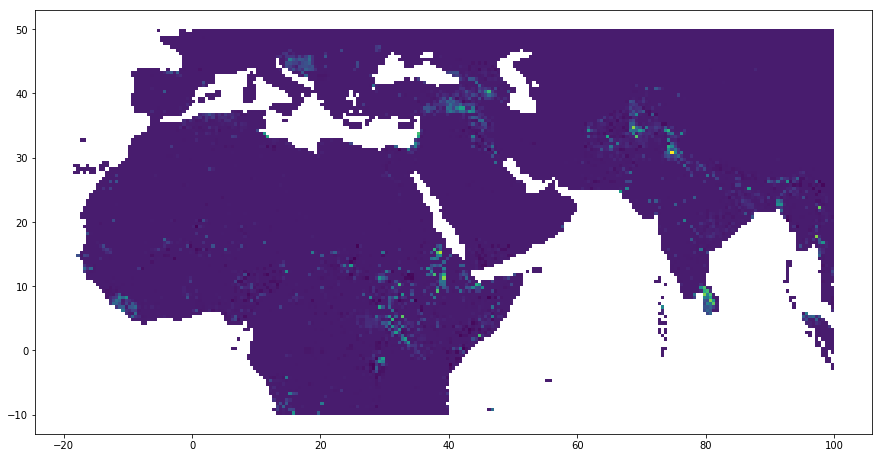

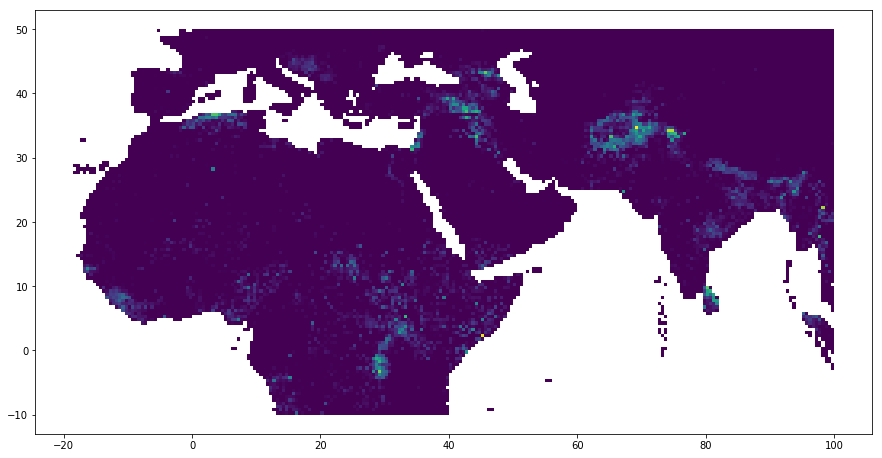

In [12]:
test_plots2(df, 2017)

# Split into train and test agian:

### use last 5 years as testset

In [19]:
def test_train(df):
        test_years = np. arange(df['year'].max()-4,df['year'].max()+1)
        train_years = df[~df['year'].isin(test_years)]['year'].unique()
        
        df_test = df[df['year'].isin(test_years)]
        df_train = df[df['year'].isin(train_years)]
        
        return(df_test, df_train)

In [20]:
df_test, df_train = test_train(df)

In [21]:
df.shape

(534093, 18)

In [22]:
df_test.shape

(92085, 18)

In [23]:
df_train.shape

(442008, 18)

# Pickle train and test

In [24]:
file_name = "new_test_df.pkl"
output = open(file_name, 'wb') # still not working right!!
pickle.dump(df_test, output)
output.close()

In [25]:
file_name = "new_train_df.pkl"
output = open(file_name, 'wb') # still not working right!!
pickle.dump(df_train, output)
output.close()

# Test the pickles:

In [26]:
pkl_file = open('new_test_df.pkl', 'rb')

pickle_test_gdf_test = pickle.load(pkl_file)

pkl_file.close()

pkl_file = open('new_train_df.pkl', 'rb')

pickle_test_gdf_train = pickle.load(pkl_file)

pkl_file.close()

In [27]:
pickle_test_gdf_test.shape

(92085, 18)

In [28]:
pickle_test_gdf_train.shape

(442008, 18)

In [29]:
max_test = pickle_test_gdf_test['year'].max()
max_test

2017

In [30]:
max_train = pickle_test_gdf_train['year'].max()
max_train

2012

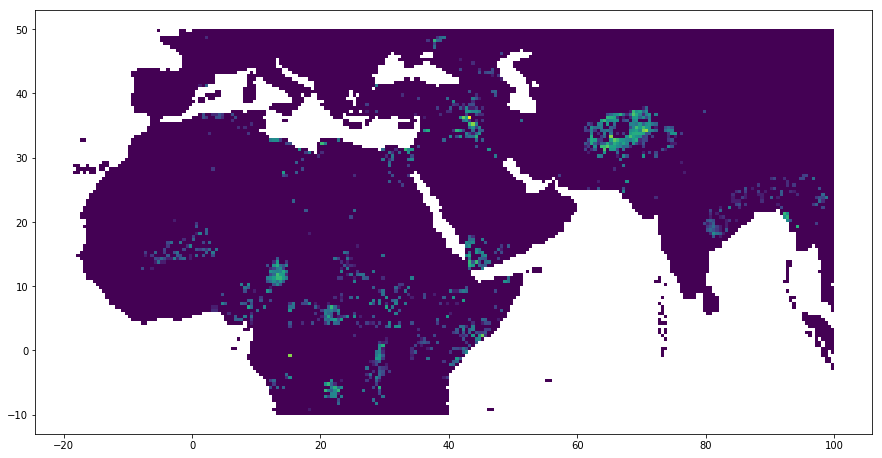

In [31]:
pickle_test_gdf_test[pickle_test_gdf_test['year']==max_test].plot(column = 'log_best', figsize=(15, 15))
plt.show()

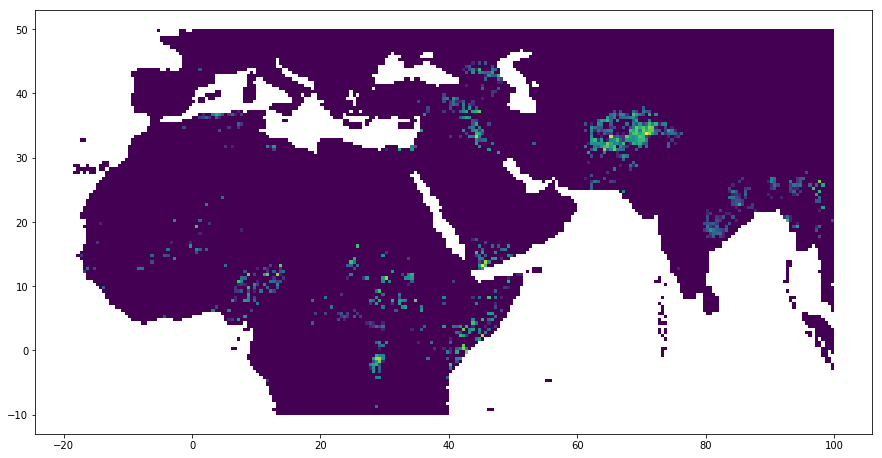

In [33]:
pickle_test_gdf_train[pickle_test_gdf_train['year']==max_train].plot(column = 'log_best', figsize=(15, 15))
plt.show()